<a href="https://colab.research.google.com/github/hohaithuy/Compare-AlexNet-VGG16-and-SIFT-on-Flowers-Dataset/blob/main/Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import random
import numpy as np
import os


import torchvision
from torchvision import models
from torchvision import transforms


import torch
import torch.nn as nn

from PIL import Image


In [ ]:
alexnet = models.alexnet(pretrained=True)
#remove last fully-connected layer
new_classifier = nn.Sequential(*list(alexnet.classifier.children())[:1])
alexnet.classifier = new_classifier

# #Updating the second classifier
# alexnet.classifier[4] = nn.Linear(4096,9)

# #Updating the third and the last classifier that is the output layer of the network. Make sure to have 2 output nodes if we are going to get 2 class labels through our model.
# alexnet.classifier[6] = nn.Linear(1024,2)


In [ ]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# # Freeze feature
# for param in alexnet.features:
#   param.requires_grad = False

In [ ]:
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(227),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.4914, 0.4822, 0.4465], 
 std=[0.2023, 0.1994, 0.2010]
 )
])

In [ ]:
path = '/content/gdrive/MyDrive/flowers/'

fulldata = []

classes = os.listdir(path)
label = 0

for folder in classes:
  print(f"{folder} : {label}")
  files = sorted(os.listdir(path + folder))[:300]
  sub_data =[(torch.unsqueeze(transform(Image.open(path + folder + '/' + i).convert('RGB')), 0), label) for i in files]
  if len(fulldata) == 0: fulldata = sub_data
  else: fulldata += sub_data
  label += 1


daisy : 0
dandelion : 1
rose : 2
sunflower : 3
tulip : 4
lotusflower : 5
hydrangea : 6
Gerbera : 7
Lily : 8


In [ ]:
random.shuffle(fulldata)

In [ ]:
img = Image.open('/content/gdrive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg')
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)
out = alexnet(fulldata[15][0])
print(out.shape)
out.detach().numpy().reshape(-1, )

torch.Size([1, 4096])


array([0.       , 0.       , 0.       , ..., 0.       , 0.5892796,
       0.       ], dtype=float32)

In [ ]:
#X = numpy.empty(shape, dtype=float, order='C', *, like=None)
X = []
y = []

for i in fulldata:
  out = alexnet(i[0])
  X.append(out.detach().numpy())
  y.append(i[1])


In [ ]:
X = np.array(X)


In [ ]:
X.shape

(2700, 1, 4096)

In [ ]:
X = np.reshape(X, (X.shape[0], X.shape[2]))

In [ ]:
X.shape

(2700, 4096)

#Test

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
def Experiment(X, y, model_used):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  clf = model_used
  clf.fit(X_train, y_train)

  y_predict = clf.predict(X_test)

  return accuracy_score(y_test,y_predict)

  print(classification_report(y_test, y_predict, target_names=classes))
  print( confusion_matrix(y_test, y_predict))
  print(accuracy_score(y_test,y_predict))


  # Plot non-normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(confusion_matrix(y_test, y_predict), classes=classes,
                        title='Confusion matrix, without normalization')
  # Plot normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(confusion_matrix(y_test, y_predict), classes=classes, normalize=True,
                        title='Normalized confusion matrix')
  plt.show()


In [ ]:
algorithms = {'LogisticRegression': LogisticRegression(),
'SVC': SVC(),
'GaussianNB': GaussianNB(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'RandomForestClassifier': RandomForestClassifier(),
'SGDClassifier': SGDClassifier(),
'KNeighborsClassifier': KNeighborsClassifier()}

results = []

for i in algorithms:
  tmp = Experiment(X, y, algorithms[i])
  print(f"{i} algorithm has acc = {tmp}")
  results.append(tmp)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression algorithm has acc = 0.8159371492704826
SVC algorithm has acc = 0.8271604938271605
GaussianNB algorithm has acc = 0.5982042648709316
DecisionTreeClassifier algorithm has acc = 0.5375982042648709
RandomForestClassifier algorithm has acc = 0.7878787878787878
SGDClassifier algorithm has acc = 0.8260381593714927
KNeighborsClassifier algorithm has acc = 0.7317620650953984


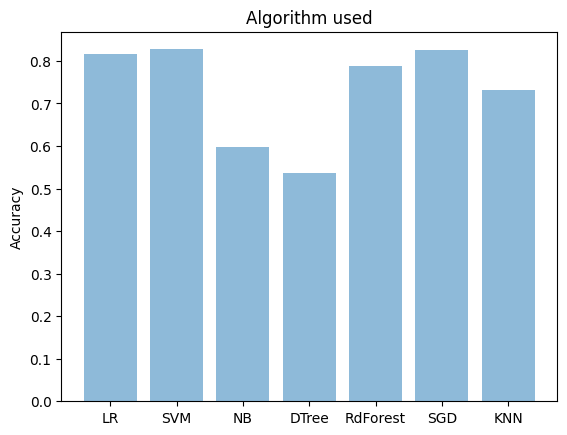

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('LR',
 'SVM',
 'NB',
 'DTree',
 'RdForest',
 'SGD',
 'KNN')
y_pos = np.arange(len(objects))
performance = results

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm used')

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

accuracy_score(y_test,y_predict)

0.8271604938271605

In [ ]:
classes

['daisy',
 'dandelion',
 'rose',
 'sunflower',
 'tulip',
 'lotusflower',
 'hydrangea',
 'Gerbera',
 'Lily']

In [ ]:
def PredictRealLife(model):
  path = input()
  imgData = (torch.unsqueeze(transform(Image.open(path).convert('RGB')), 0))
  alexnet_output = alexnet(imgData)
  predictData = alexnet_output.detach().numpy()
  labelPredict = clf.predict(predictData)

  return classes[labelPredict[0]]

In [ ]:
PredictRealLife(clf)